# TSA Chapter 1: Spurious Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/QuantLet/TSA/blob/main/TSA_ch1/TSA_ch1_spurious_regression/TSA_ch1_spurious_regression.ipynb)

This notebook demonstrates:
- Two independent random walks can produce a misleadingly high R²
- The Granger & Newbold (1974) spurious regression problem
- Non-stationary residuals as a diagnostic signal

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Style configuration
COLORS = {
    'blue': '#1A3A6E',
    'red': '#DC3545',
    'green': '#2E7D32',
    'orange': '#E67E22',
    'gray': '#666666',
    'purple': '#8E44AD',
}

plt.rcParams.update({
    'axes.facecolor': 'none',
    'figure.facecolor': 'none',
    'savefig.transparent': True,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': False,
    'font.size': 9,
    'axes.titlesize': 10,
    'axes.labelsize': 9,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'legend.fontsize': 8,
    'figure.dpi': 150,
    'lines.linewidth': 1.2,
    'axes.edgecolor': '#333333',
    'axes.linewidth': 0.8,
})

def save_chart(fig, name):
    fig.savefig(f'{name}.pdf', bbox_inches='tight', transparent=True, dpi=150)
    fig.savefig(f'{name}.png', bbox_inches='tight', transparent=True, dpi=150)
    try:
        charts_path = os.path.join('..', '..', '..', 'charts', name)
        fig.savefig(f'{charts_path}.pdf', bbox_inches='tight', transparent=True, dpi=150)
        fig.savefig(f'{charts_path}.png', bbox_inches='tight', transparent=True, dpi=150)
    except Exception:
        pass
    print(f'Saved: {name}.pdf + .png')
def add_legend_below(ax, ncol=3):
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=ncol, frameon=False, fontsize=8)


Saved: ch1_spurious_regression.pdf + .png


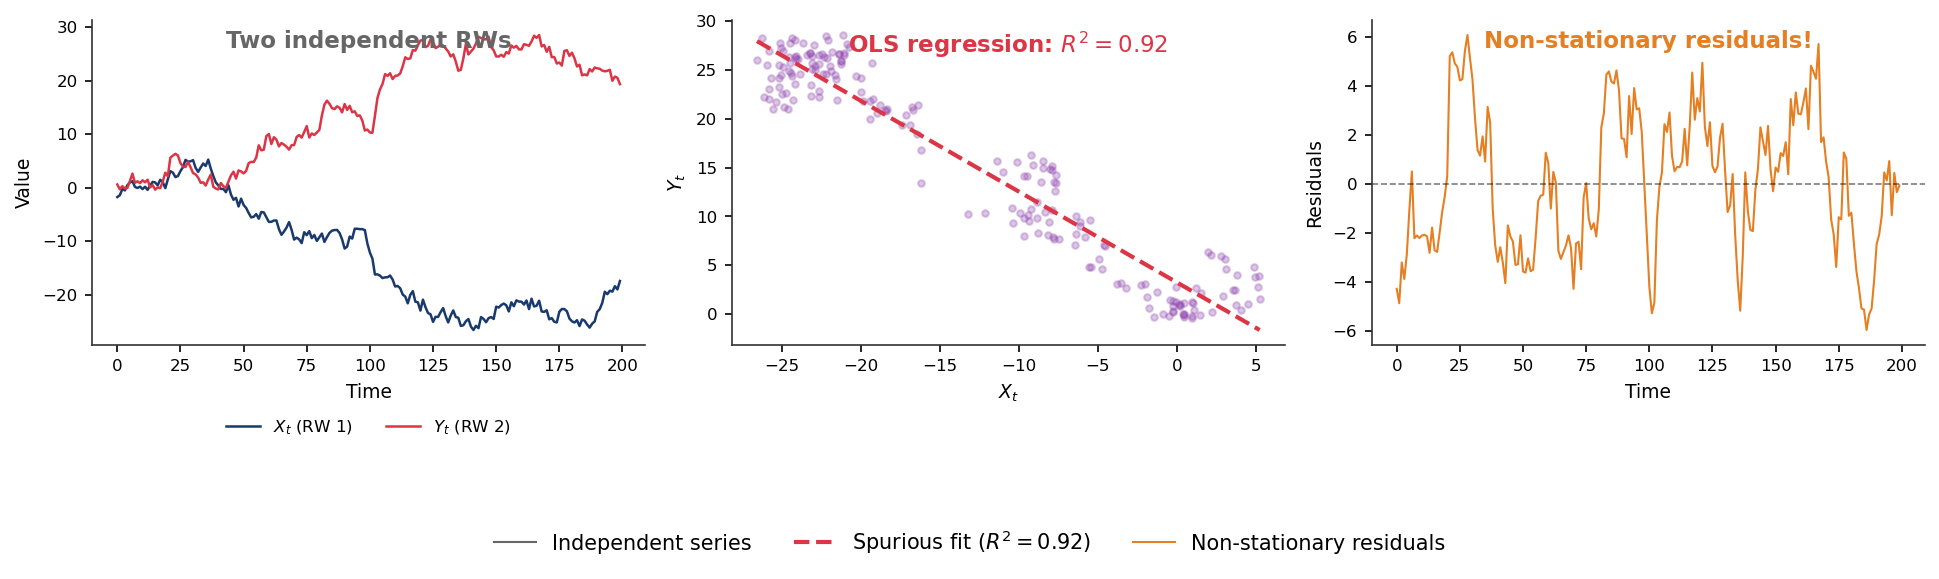


R² = 0.9204 between two INDEPENDENT random walks!
This demonstrates the Granger & Newbold (1974) spurious regression problem.


In [3]:
# Chart: ch1_spurious_regression
# Two independent random walks producing a misleadingly high R²
np.random.seed(100)
n = 200

# Two completely independent random walks
rw1 = np.cumsum(np.random.normal(0, 1, n))
rw2 = np.cumsum(np.random.normal(0, 1, n))

fig, axes = plt.subplots(1, 3, figsize=(13, 3.5))

# Panel 1: Both series
axes[0].plot(rw1, color=COLORS['blue'], lw=1.2, label='$X_t$ (RW 1)')
axes[0].plot(rw2, color=COLORS['red'], lw=1.2, label='$Y_t$ (RW 2)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Value')
add_legend_below(axes[0], ncol=2)
axes[0].text(0.5, 0.97, 'Two independent RWs', transform=axes[0].transAxes,
             ha='center', va='top', fontsize=11, fontweight='bold', color=COLORS['gray'])

# Panel 2: Scatter + OLS
b, a = np.polyfit(rw1, rw2, 1)
axes[1].scatter(rw1, rw2, color=COLORS['purple'], alpha=0.3, s=10)
x_fit = np.linspace(rw1.min(), rw1.max(), 100)
axes[1].plot(x_fit, b * x_fit + a, color=COLORS['red'], lw=2, ls='--')
# Compute R²
ss_res = np.sum((rw2 - (b * rw1 + a))**2)
ss_tot = np.sum((rw2 - np.mean(rw2))**2)
r2 = 1 - ss_res / ss_tot
axes[1].set_xlabel('$X_t$')
axes[1].set_ylabel('$Y_t$')
axes[1].text(0.5, 0.97, f'OLS regression: $R^2 = {r2:.2f}$', transform=axes[1].transAxes,
             ha='center', va='top', fontsize=11, fontweight='bold', color=COLORS['red'])

# Panel 3: Residuals (clearly non-stationary)
residuals = rw2 - (b * rw1 + a)
axes[2].plot(residuals, color=COLORS['orange'], lw=1)
axes[2].axhline(0, color='black', ls='--', lw=0.8, alpha=0.5)
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Residuals')
axes[2].text(0.5, 0.97, 'Non-stationary residuals!', transform=axes[2].transAxes,
             ha='center', va='top', fontsize=11, fontweight='bold', color=COLORS['orange'])

handles = [
    plt.Line2D([0], [0], color=COLORS['gray'], lw=1, label='Independent series'),
    plt.Line2D([0], [0], color=COLORS['red'], lw=2, ls='--', label=f'Spurious fit ($R^2={r2:.2f}$)'),
    plt.Line2D([0], [0], color=COLORS['orange'], lw=1, label='Non-stationary residuals'),
]
fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 0.02),
           ncol=3, frameon=False, fontsize=10)
plt.tight_layout(rect=[0, 0.08, 1, 1])
save_chart(fig, 'ch1_spurious_regression')
plt.show()

print(f'\nR² = {r2:.4f} between two INDEPENDENT random walks!')
print('This demonstrates the Granger & Newbold (1974) spurious regression problem.')

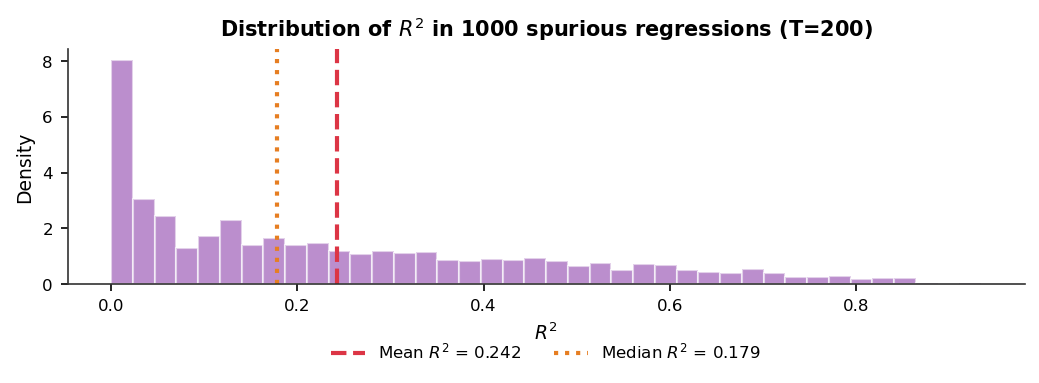

Mean R² = 0.2422
Median R² = 0.1786
P(R² > 0.5) = 0.157
P(R² > 0.8) = 0.014


In [4]:
# Monte Carlo simulation: distribution of R² in spurious regressions
np.random.seed(42)
n_sim = 1000
n_obs = 200
r2_values = []

for _ in range(n_sim):
    x = np.cumsum(np.random.normal(0, 1, n_obs))
    y = np.cumsum(np.random.normal(0, 1, n_obs))
    b_mc, a_mc = np.polyfit(x, y, 1)
    ss_r = np.sum((y - (b_mc * x + a_mc))**2)
    ss_t = np.sum((y - np.mean(y))**2)
    r2_values.append(1 - ss_r / ss_t)

r2_values = np.array(r2_values)

fig, ax = plt.subplots(figsize=(7, 3.0))
ax.hist(r2_values, bins=40, color=COLORS['purple'], alpha=0.6, edgecolor='white', density=True)
ax.axvline(np.mean(r2_values), color=COLORS['red'], lw=2, ls='--',
           label=f'Mean $R^2$ = {np.mean(r2_values):.3f}')
ax.axvline(np.median(r2_values), color=COLORS['orange'], lw=2, ls=':',
           label=f'Median $R^2$ = {np.median(r2_values):.3f}')
ax.set_xlabel('$R^2$')
ax.set_ylabel('Density')
ax.set_title(f'Distribution of $R^2$ in {n_sim} spurious regressions (T={n_obs})',
             fontsize=10, fontweight='bold')
add_legend_below(ax, ncol=2)
fig.tight_layout(rect=[0, 0.08, 1, 1])
plt.show()

print(f'Mean R² = {np.mean(r2_values):.4f}')
print(f'Median R² = {np.median(r2_values):.4f}')
print(f'P(R² > 0.5) = {np.mean(r2_values > 0.5):.3f}')
print(f'P(R² > 0.8) = {np.mean(r2_values > 0.8):.3f}')